In [106]:
%run ../bd_matching_v2
onc_match = match_onc()
ngc_match = match_ngc()
ic_match = match_ic()

In [108]:
# for item in [onc_match.all_matches, onc_match.lowmass, onc_match.approved, onc_match.statistical, onc_match.color]:

#     print(f"{len(item)}")
print("ONC:")
for attr, value in onc_match.__dict__.items():
    if attr != 'not_lowmass':
        print(f"{attr:13s}", len(value))
print('')
print("NGC 1333:")
for attr, value in ngc_match.__dict__.items():
    if attr != 'not_lowmass':
        print(f"{attr:13s}", len(value))
print('')
print("IC 348:")
for attr, value in ic_match.__dict__.items():
    if attr != 'not_lowmass':
        print(f"{attr:13s}", len(value))

ONC:
all_matches   775
lowmass       394
approved      336
statistical   215
color         196

NGC 1333:
all_matches   186
lowmass       105
approved      103
statistical   69
color         68

IC 348:
all_matches   462
lowmass       234
approved      225
statistical   181
color         170


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: FixedFormatter should only be used together with FixedLocator


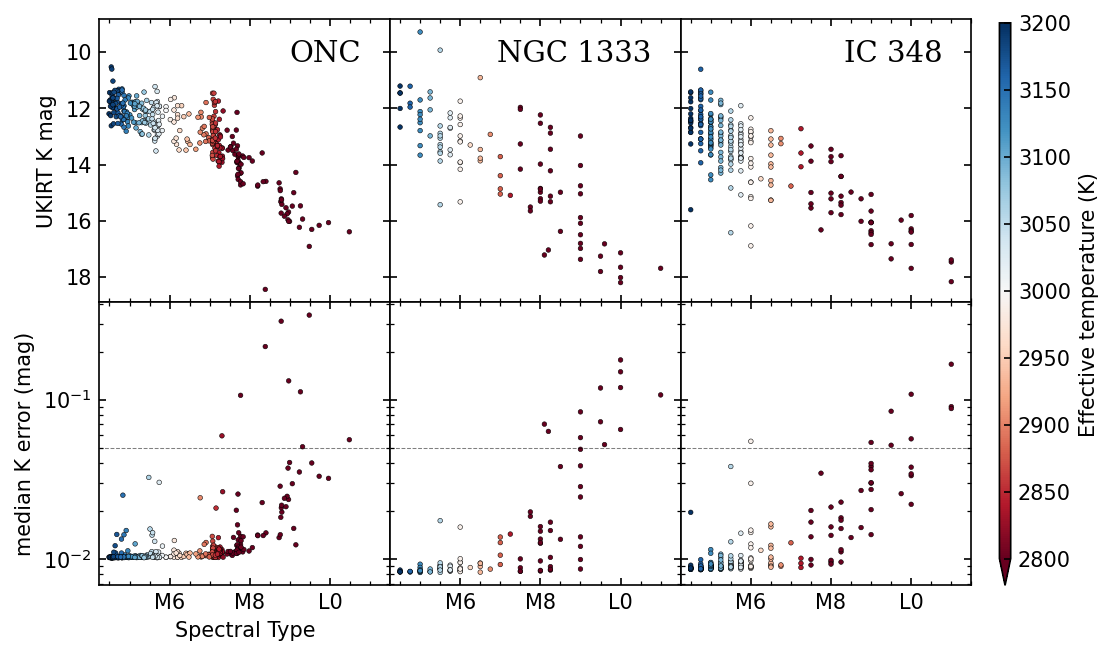

In [183]:
import matplotlib as mpl

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True

fig, axs = plt.subplots(ncols=3, nrows=2, sharex=True, sharey='row', figsize=(7.5, 5), dpi=150)
fig.subplots_adjust(wspace=0, hspace=0)

matches = [onc_match, ngc_match, ic_match]
names = ["ONC", "NGC 1333", "IC 348"]

for i, match in enumerate(matches):
    
    ax_hr, ax_err = axs[:,i]
    sc = ax_hr.scatter(
        match.approved['SpT'], 
        match.approved['median_KAPERMAG3'], 
        s=5, 
        ec='k',
        linewidths=0.25,
        c=match.approved['Teff'],
        cmap='RdBu',
        vmin=2800,
        vmax=3200
    )
    
    ax_hr.invert_yaxis()
    
    ax_err.scatter(
        match.approved['SpT'], 
        match.approved['median_KAPERMAG3ERR'],
        s=5, 
        ec='k',
        linewidths=0.25,
        c=match.approved['Teff'],
        cmap='RdBu',
        vmin=2800,
        vmax=3200
    )
    ax_err.semilogy()
    ax_err.axhline(0.05, ls='--', color='k', lw=0.5, alpha=0.5)
    
#     ax_err.set_xticklabels()

    ax_err.set_xlim(4.25, 11.5)
    
    xticks = ax_err.get_xticks()
    xticks_minor = np.arange(4.5, 12, 0.5)
    ax_err.set_xticks(xticks_minor, minor=True)
    new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
    ax_err.set_xticklabels(new_xtick_labels)
    
    ax_hr.text(0.9, 0.85, names[i], transform=ax_hr.transAxes, horizontalalignment='right', fontsize=14, family='serif')

    

    
axs[0,0].set_ylabel("UKIRT K mag")
axs[1,0].set_ylabel("median K error (mag)")
axs[1,0].set_xlabel("Spectral Type")

cbar_ax = fig.add_axes([0.925, 0.125, 0.01, 0.75])
cbar = plt.colorbar(sc, cax=cbar_ax, extend='min')
cbar.set_label("Effective temperature (K)")


/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(4.0, 0, 'M4'),
 Text(5.0, 0, 'M5'),
 Text(6.0, 0, 'M6'),
 Text(7.0, 0, 'M7'),
 Text(8.0, 0, 'M8'),
 Text(9.0, 0, 'M9'),
 Text(10.0, 0, 'L0'),
 Text(11.0, 0, 'L1')]

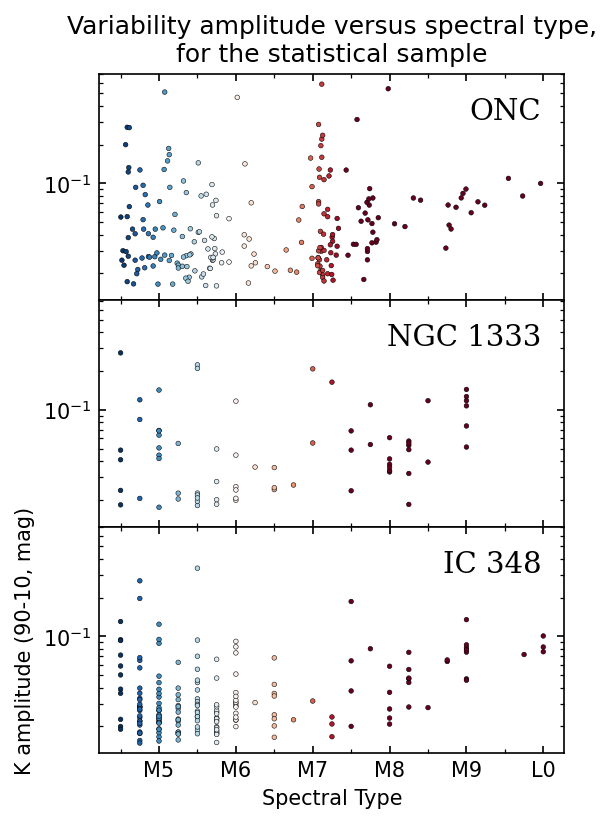

In [180]:
matches = [onc_match, ngc_match, ic_match]
names = ["ONC", "NGC 1333", "IC 348"]

fig, axs = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(4,6), sharey=True, dpi=150)
fig.subplots_adjust(hspace=0)
for i, ax in enumerate(axs):
    
    ax.scatter(matches[i].statistical['SpT'], matches[i].statistical['range_KAPERMAG3'],         
        s=5, 
        ec='k',
        linewidths=0.25,
        c=matches[i].statistical['Teff'],
        cmap='RdBu',
        vmin=2800,
        vmax=3200)
    
    ax.semilogy()
    
    ax.text(0.95, 0.8, names[i], transform=ax.transAxes, horizontalalignment='right', fontsize=14, family='serif')
    
axs[0].set_title("Variability amplitude versus spectral type,\nfor the statistical sample")

axs[-1].set_xlabel("Spectral Type")
axs[-1].set_ylabel("K amplitude (90-10, mag)")

xticks = axs[-1].get_xticks()
xticks_minor = np.arange(4.5, 10.5, 0.5)
axs[-1].set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
axs[-1].set_xticklabels(new_xtick_labels)

/Users/tsrice/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(4.0, 0, 'M4'),
 Text(5.0, 0, 'M5'),
 Text(6.0, 0, 'M6'),
 Text(7.0, 0, 'M7'),
 Text(8.0, 0, 'M8'),
 Text(9.0, 0, 'M9'),
 Text(10.0, 0, 'L0'),
 Text(11.0, 0, 'L1')]

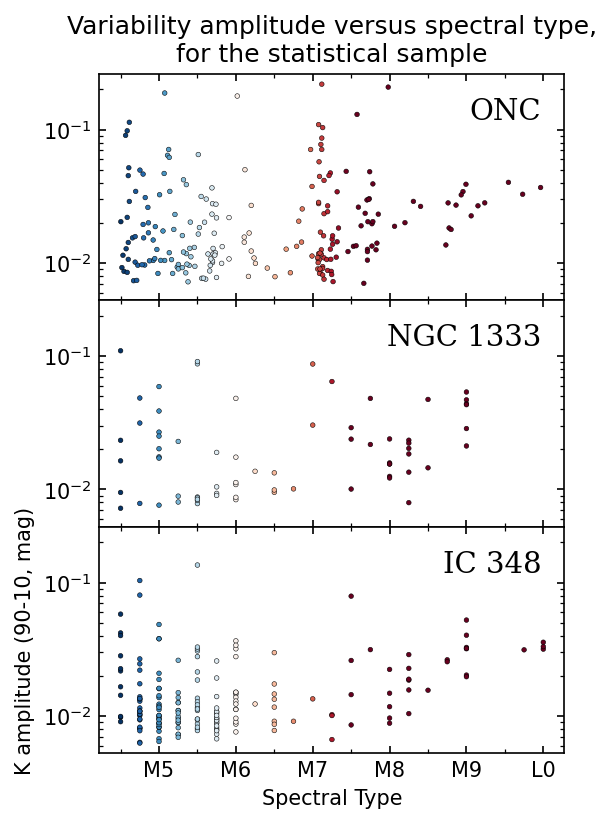

In [181]:
matches = [onc_match, ngc_match, ic_match]
names = ["ONC", "NGC 1333", "IC 348"]

fig, axs = plt.subplots(ncols=1, nrows=3, sharex=True, figsize=(4,6), sharey=True, dpi=150)
fig.subplots_adjust(hspace=0)
for i, ax in enumerate(axs):
    
    ax.scatter(matches[i].statistical['SpT'], matches[i].statistical['std_KAPERMAG3'],         
        s=5, 
        ec='k',
        linewidths=0.25,
        c=matches[i].statistical['Teff'],
        cmap='RdBu',
        vmin=2800,
        vmax=3200)
    
    ax.semilogy()
    
    ax.text(0.95, 0.8, names[i], transform=ax.transAxes, horizontalalignment='right', fontsize=14, family='serif')
    
axs[0].set_title("Variability amplitude versus spectral type,\nfor the statistical sample")

axs[-1].set_xlabel("Spectral Type")
axs[-1].set_ylabel("K amplitude (90-10, mag)")

xticks = axs[-1].get_xticks()
xticks_minor = np.arange(4.5, 10.5, 0.5)
axs[-1].set_xticks(xticks_minor, minor=True)
new_xtick_labels = [get_SpT_from_num(x)[:-2] for x in xticks]
axs[-1].set_xticklabels(new_xtick_labels)

(17.0, 10.12665958404541)

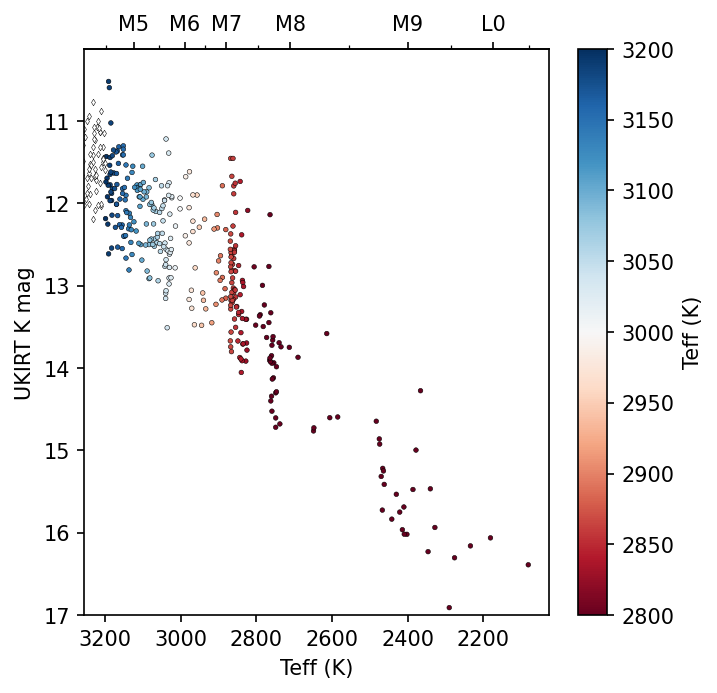

In [78]:
fig, ax = plt.subplots(1, figsize=(5,5), dpi=150)

plt.scatter(
    onc_match.approved['Teff'], 
    onc_match.approved['median_KAPERMAG3'], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=onc_match.approved['Teff'],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)

plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("UKIRT K mag")
cbar.set_label("Teff (K)")
plt.xlabel("Teff (K)")

plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

plt.scatter(
    onc_match.not_lowmass['Teff'], 
    onc_match.not_lowmass['median_KAPERMAG3'],     
    s=5, 
    ec='k',
    marker='d',
    linewidths=0.25,
    facecolor='w',
)
plt.xlim(xlims)
plt.ylim(ylims)

secax = ax.secondary_xaxis('top', functions=(get_SpT_from_Teff, get_Teff_from_SpT))

spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(spt_xticks)
spt_xticks_minor = np.arange(4.5, 12, 0.5)
secax.set_xticks(spt_xticks_minor, minor=True)
# secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
xticks = secax.get_xticks()
new_xtick_labels = [get_SpT_from_num(x) for x in xticks]
secax.set_xticklabels(new_xtick_labels)

ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

(17.0, 10.12665958404541)

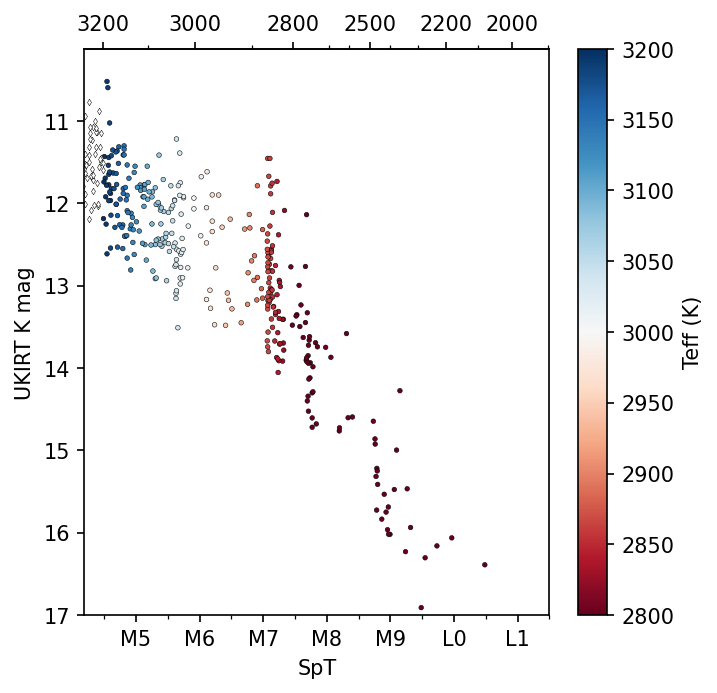

In [84]:
fig, ax = plt.subplots(1, figsize=(5,5), dpi=150)

plt.scatter(
    onc_match.approved['SpT'], 
    onc_match.approved['median_KAPERMAG3'], 
    s=5, 
    ec='k',
    linewidths=0.25,
    c=onc_match.approved['Teff'],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)

plt.gca().invert_yaxis()
cbar = plt.colorbar()
plt.ylabel("UKIRT K mag")
cbar.set_label("Teff (K)")
plt.xlabel("SpT")

# plt.gca().invert_xaxis()
xlims = plt.xlim()
ylims = plt.ylim()

plt.scatter(
    onc_match.not_lowmass['SpT'], 
    onc_match.not_lowmass['median_KAPERMAG3'],     
    s=5, 
    ec='k',
    marker='d',
    linewidths=0.25,
    facecolor='w',
)
plt.xlim(xlims)
plt.ylim(ylims)

secax = ax.secondary_xaxis('top', functions=(get_Teff_from_SpT, get_SpT_from_Teff))
teff_xticks = [3200, 3000, 2800, 2500, 2200, 2000]
# spt_xticks = np.arange(5, 12, 1)
secax.set_xticks(teff_xticks)
teff_xticks_minor = np.arange(3200, 1800, -100)
secax.set_xticks(teff_xticks_minor, minor=True)


spt_xticks = np.arange(5, 12, 1)
ax.set_xticks(spt_xticks)
spt_xticks_minor = np.arange(4.5, 12, 0.5)
ax.set_xticks(spt_xticks_minor, minor=True)
# secax.set_xticks([4.5, 6, 7, 8, 9, 10, 11])
# xticks = secax.get_xticks()
new_xtick_labels = [get_SpT_from_num(x) for x in spt_xticks]
ax.set_xticklabels(new_xtick_labels)

ax.set_ylim(17, None)

# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.pdf", bbox_inches='tight')
# plt.savefig("ONC_HRD_Kmag_lateSpTs_Teff.png")

Text(0.5, 0, 'SpT')

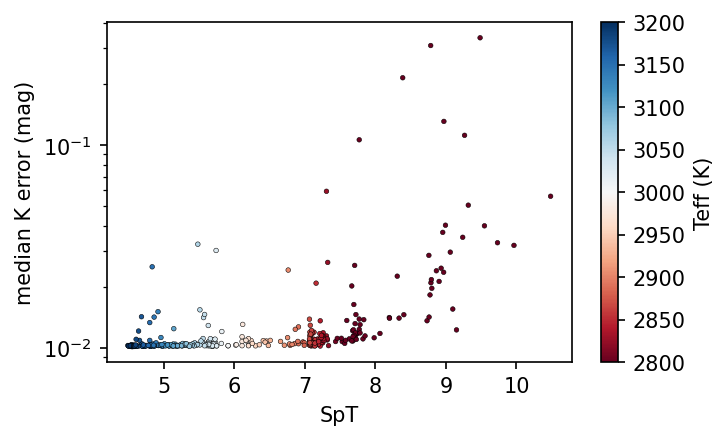

In [89]:
fig, ax = plt.subplots(1, figsize=(5,3), dpi=150)

plt.scatter(
    onc_match.approved['SpT'], 
    onc_match.approved['median_KAPERMAG3ERR'],
    s=5, 
    ec='k',
    linewidths=0.25,
    c=onc_match.approved['Teff'],
    cmap='RdBu',
    vmin=2800,
    vmax=3200
)
plt.semilogy()
cbar = plt.colorbar()
plt.ylabel("median K error (mag)")
cbar.set_label("Teff (K)")
plt.xlabel("SpT")

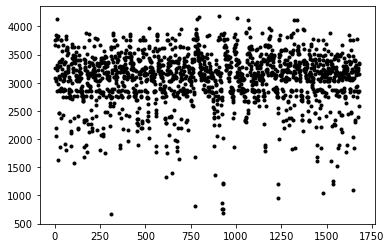

In [9]:
plt.plot(robb_joined["Teff"], 'k.')

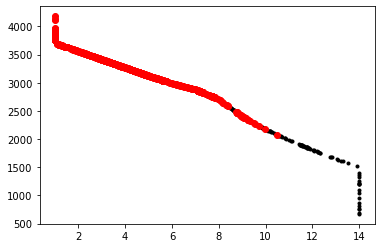

In [19]:
for x in matches_sm.columns:
    print(x)
    matches_sm.rename()

MEANMJDOBS
RA
DEC
JMHPNT
JMHPNTERR
HMKPNT
HMKPNTERR
JAPERMAG3
JAPERMAG3ERR
HAPERMAG3
HAPERMAG3ERR
KAPERMAG3
KAPERMAG3ERR
JPPERRBITS
HPPERRBITS
KPPERRBITS
MERGEDCLASS
PSTAR
JGRADE
HGRADE
KGRADE


In [22]:
matches_sm.rename(columns=lambda name: 'median_'+name)

,median_MEANMJDOBS,median_RA,median_DEC,median_JMHPNT,median_JMHPNTERR,median_HMKPNT,median_HMKPNTERR,median_JAPERMAG3,median_JAPERMAG3ERR,median_HAPERMAG3,...,median_KAPERMAG3,median_KAPERMAG3ERR,median_JPPERRBITS,median_HPPERRBITS,median_KPPERRBITS,median_MERGEDCLASS,median_PSTAR,median_JGRADE,median_HGRADE,median_KGRADE
SOURCEID,,,,,,,,,,,,,,,,,,,,,
44199508515229,54127.830160,1.459556,-0.095256,0.162542,0.021010,0.064474,0.021011,9.809515,0.010111,9.644861,...,9.579768,0.010113,0.0,0.0,0.0,-1.0,0.999657,0.956582,0.966121,0.965291
44199508515373,54127.334627,1.459381,-0.094998,0.969075,0.021063,0.742379,0.021030,12.033216,0.010185,11.096613,...,10.368012,0.010126,16.0,16.0,16.0,-1.0,0.999657,0.957854,0.971429,0.970917
44199508515131,54127.830160,1.459671,-0.095008,0.638554,0.021082,0.241598,0.021065,12.234275,0.010201,11.599011,...,11.359353,0.010170,0.0,0.0,0.0,-1.0,0.999657,0.956582,0.966121,0.965291
44199508515375,54127.830702,1.459402,-0.095022,0.643117,0.021298,0.366966,0.021219,13.512184,0.010453,12.871636,...,12.502649,0.010325,16.0,16.0,16.0,-1.0,0.999657,0.957819,0.971399,0.970917
44199508515199,54127.830160,1.459532,-0.094623,0.601519,0.021254,0.308096,0.021206,13.343151,0.010399,12.743423,...,12.434407,0.010318,0.0,0.0,0.0,-1.0,0.999657,0.956582,0.966121,0.965291
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44199508565551,54119.382990,1.464816,-0.099107,0.799648,0.021247,0.365507,0.021174,13.456958,0.010410,12.658654,...,12.293901,0.010277,0.0,0.0,0.0,-1.0,0.999657,0.935897,0.973430,0.976562
44199508565550,54119.382990,1.464819,-0.099074,0.540185,0.022366,0.362074,0.022396,14.957703,0.011521,14.415291,...,14.054878,0.011516,0.0,0.0,0.0,-1.0,0.999657,0.935897,0.973430,0.976562
44199508565684,54119.382990,1.464552,-0.099192,0.696624,0.021085,0.181876,0.021069,12.346519,0.010205,11.650251,...,11.466814,0.010175,0.0,0.0,0.0,-1.0,0.999657,0.935897,0.973430,0.976562


In [31]:
joint_matches

SOURCEID,median_MEANMJDOBS,median_RA,median_DEC,median_JMHPNT,median_JMHPNTERR,median_HMKPNT,median_HMKPNTERR,median_JAPERMAG3,median_JAPERMAG3ERR,median_HAPERMAG3,median_HAPERMAG3ERR,median_KAPERMAG3,median_KAPERMAG3ERR,median_JPPERRBITS,median_HPPERRBITS,median_KPPERRBITS,median_MERGEDCLASS,median_PSTAR,median_JGRADE,median_HGRADE,median_KGRADE,var_J_red_chisq,var_H_red_chisq,var_K_red_chisq,var_Stetson_HK,var_Stetson_JK,var_Stetson_JH,var_Stetson_JHK,std_MEANMJDOBS,std_RA,std_DEC,std_JMHPNT,std_JMHPNTERR,std_HMKPNT,std_HMKPNTERR,std_JAPERMAG3,std_JAPERMAG3ERR,std_HAPERMAG3,std_HAPERMAG3ERR,std_KAPERMAG3,std_KAPERMAG3ERR,std_JPPERRBITS,std_HPPERRBITS,std_KPPERRBITS,std_MERGEDCLASS,std_PSTAR,std_JGRADE,std_HGRADE,std_KGRADE,range_MEANMJDOBS,range_RA,range_DEC,range_JMHPNT,range_JMHPNTERR,range_HMKPNT,range_HMKPNTERR,range_JAPERMAG3,range_JAPERMAG3ERR,range_HAPERMAG3,range_HAPERMAG3ERR,range_KAPERMAG3,range_KAPERMAG3ERR,range_JPPERRBITS,range_HPPERRBITS,range_KPPERRBITS,range_MERGEDCLASS,range_PSTAR,range_JGRADE,range_HGRADE,range_KGRADE,index,RAdeg,DEdeg,Xpix,Ypix,l_mag130,mag130,e_mag130,l_mag139,mag139,e_mag139,color,e_color,Ndet,log(BF),Mstar,Teff,Av,SpT
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,pix,pix,,mag,mag,,mag,mag,mag,mag,,dex(---),Msun,K,mag,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64
44199508515229,54127.83016,1.4595563265469265,-0.09525595451080712,0.16254234313964844,0.021010039374232292,0.06447410583496094,0.02101118117570877,9.809514999389648,0.010110573843121529,9.644861221313477,0.010107433423399925,9.579768180847168,0.010112807154655457,0.0,0.0,0.0,-1.0,0.9996572136878967,0.9565820693969727,0.9661210775375366,0.9652907252311707,1.0238651213098746,5.0046440258360745,1.319899839513442,0.8477999665016351,0.4885361712911855,0.6156789733142387,1.81858645203293,237.41124447942315,5.722769485059605e-08,7.369739521069548e-08,0.017681987956166267,8.696549116393726e-07,0.016630956903100014,7.345694825744431e-07,0.010148721747100353,1.3563120546677965e-06,0.022416546940803528,6.070286531212332e-07,0.011533980257809162,1.2422323152350145e-06,0.0,0.0,0.0,0.0,0.010321599431335926,0.3233976662158966,0.11339040845632553,0.14609721302986145,685.7533664700022,1.255307915393189e-07,1.8806132889848115e-07,0.05218791961669922,1.911073923110962e-06,0.04003410339355468,1.8920749425867245e-06,0.027527141571045632,3.286637365816289e-06,0.05725717544555664,1.5553086996078491e-06,0.026859664916992543,3.0333176255226135e-06,0.0,0.0,0.0,0.0,0.005792200565338135,0.9967309296131134,0.15742077827453616,0.16132798194885256,1,83.626381,-5.457797,10112.94,7947.76,<,9.8,0.02,<,9.78,0.2,-0.08,0.12,3,2.0,0.91,3757,-3.62,1.0
44199508515373,54127.3346267,1.4593812845909209,-0.0949975297034495,0.9690752029418945,0.021063176915049553,0.7423791885375977,0.02103007584810257,12.03321647644043,0.01018538512289524,11.096612930297852,0.010129026137292385,10.368012428283691,0.010126176290214062,16.0,16.0,16.0,-1.0,0.9996572136878967,0.9578543901443481,0.9714285731315613,0.9709172248840332,439.013916015625,201.08231209150327,149.10515372983872,4.150444030761719,4.763700277498453,12.2203662109375,17.919610248348576,233.85513000234258,1.807905734038314e-07,1.6686637172284723e-07,0.0827331617474556,2.0087840312044136e-05,0.12166276574134827,5.288270131131867e-06,0.2132440

In [29]:
matches_sr.rename(columns=lambda name: "range_" + name)

,range_MEANMJDOBS,range_RA,range_DEC,range_JMHPNT,range_JMHPNTERR,range_HMKPNT,range_HMKPNTERR,range_JAPERMAG3,range_JAPERMAG3ERR,range_HAPERMAG3,...,range_KAPERMAG3,range_KAPERMAG3ERR,range_JPPERRBITS,range_HPPERRBITS,range_KPPERRBITS,range_MERGEDCLASS,range_PSTAR,range_JGRADE,range_HGRADE,range_KGRADE
SOURCEID,,,,,,,,,,,,,,,,,,,,,
44199508515229,685.753366,1.255308e-07,1.880613e-07,0.052188,0.000002,0.040034,0.000002,0.027527,0.000003,0.057257,...,0.026860,0.000003,0.0,0.0,0.0,0.0,0.005792,0.996731,0.157421,0.161328
44199508515373,651.645519,4.050858e-07,3.693788e-07,0.206620,0.000040,0.306800,0.000012,0.590196,0.000057,0.369058,...,0.307756,0.000011,16.0,0.0,0.0,0.0,0.005792,0.996730,0.128863,0.140642
44199508515131,685.753366,1.208365e-07,8.218355e-08,0.018186,0.000024,0.020519,0.000015,0.048666,0.000037,0.053799,...,0.048962,0.000021,0.0,0.0,0.0,0.0,0.005792,0.996731,0.157421,0.161328
44199508515375,720.080211,3.559925e-07,3.685470e-07,0.029025,0.000117,0.026315,0.000061,0.031387,0.000163,0.035386,...,0.029849,0.000078,16.0,0.0,0.0,0.0,0.005792,0.996729,0.128706,0.139857
44199508515199,685.753366,1.259936e-07,9.805072e-08,0.020792,0.000093,0.019527,0.000052,0.025909,0.000128,0.028788,...,0.028235,0.000072,0.0,0.0,0.0,0.0,0.005792,0.996731,0.157421,0.161328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44199508565551,130.281422,7.180008e-08,6.682982e-08,0.019467,0.000081,0.023240,0.000047,0.017738,0.000128,0.024237,...,0.026268,0.000066,0.0,0.0,0.0,0.0,0.005792,0.995556,0.128513,0.172621
44199508565550,130.281422,9.328953e-08,7.540711e-08,0.020911,0.000713,0.025657,0.000641,0.020449,0.000756,0.023176,...,0.028874,0.000666,0.0,0.0,0.0,0.0,0.005792,0.995556,0.128513,0.172621
44199508565684,130.281422,7.554309e-08,7.252305e-08,0.019923,0.000027,0.023362,0.000017,0.055519,0.000038,0.041847,...,0.044362,0.000027,0.0,0.0,0.0,0.0,0.005792,0.995556,0.128513,0.172621


In [34]:
approved_criteria

array([False, False, False,  True,  True,  True, False,  True, False,
       False, False, False, False,  True, False, False,  True,  True,
        True, False,  True,  True, False, False, False,  True, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
        True, False,  True,  True, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False, False, False,
       False, False,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False, False, False,
       False, False, False,  True,  True, False,  True, False,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,

In [37]:
onc_match.approved

SOURCEID,median_MEANMJDOBS,median_RA,median_DEC,median_JMHPNT,median_JMHPNTERR,median_HMKPNT,median_HMKPNTERR,median_JAPERMAG3,median_JAPERMAG3ERR,median_HAPERMAG3,median_HAPERMAG3ERR,median_KAPERMAG3,median_KAPERMAG3ERR,median_JPPERRBITS,median_HPPERRBITS,median_KPPERRBITS,median_MERGEDCLASS,median_PSTAR,median_JGRADE,median_HGRADE,median_KGRADE,var_J_red_chisq,var_H_red_chisq,var_K_red_chisq,var_Stetson_HK,var_Stetson_JK,var_Stetson_JH,var_Stetson_JHK,std_MEANMJDOBS,std_RA,std_DEC,std_JMHPNT,std_JMHPNTERR,std_HMKPNT,std_HMKPNTERR,std_JAPERMAG3,std_JAPERMAG3ERR,std_HAPERMAG3,std_HAPERMAG3ERR,std_KAPERMAG3,std_KAPERMAG3ERR,std_JPPERRBITS,std_HPPERRBITS,std_KPPERRBITS,std_MERGEDCLASS,std_PSTAR,std_JGRADE,std_HGRADE,std_KGRADE,range_MEANMJDOBS,range_RA,range_DEC,range_JMHPNT,range_JMHPNTERR,range_HMKPNT,range_HMKPNTERR,range_JAPERMAG3,range_JAPERMAG3ERR,range_HAPERMAG3,range_HAPERMAG3ERR,range_KAPERMAG3,range_KAPERMAG3ERR,range_JPPERRBITS,range_HPPERRBITS,range_KPPERRBITS,range_MERGEDCLASS,range_PSTAR,range_JGRADE,range_HGRADE,range_KGRADE,index,RAdeg,DEdeg,Xpix,Ypix,l_mag130,mag130,e_mag130,l_mag139,mag139,e_mag139,color,e_color,Ndet,log(BF),Mstar,Teff,Av,SpT
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,pix,pix,,mag,mag,,mag,mag,mag,mag,,dex(---),Msun,K,mag,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64
44199508515375,54127.830701700004,1.4594020620883397,-0.09502202362236571,0.6431174278259277,0.021297559142112732,0.36696624755859375,0.021219439804553986,13.512184143066406,0.010452834889292717,12.871636390686035,0.01027637254446745,12.502649307250977,0.010324781760573387,16.0,16.0,16.0,-1.0,0.9996572136878967,0.9578189849853516,0.9713993668556213,0.9709172248840332,1.5325661592705304,1.7294769287109375,1.3095932492784634,0.5139585045295033,0.3615432519179124,0.5869193443885217,1.2563500219537307,237.41753848049956,1.5117603777843054e-07,1.618394488306759e-07,0.012734085321426392,5.443862028187141e-05,0.010652006603777409,2.940889862657059e-05,0.012936217710375786,8.076905942289159e-05,0.013477504253387451,3.34317228407599e-05,0.011787650175392628,3.3606334909563884e-05,5.772819396705759,4.703380691654247,1.2688571226472574,0.0,0.022058866918087006,0.33236148953437805,0.12295123189687729,0.12467862665653229,720.0802113099926,3.559925461082969e-07,3.685470071901342e-07,0.029025363922119074,0.0001171739771962145,0.026314544677734364,6.136260926723619e-05,0.031386566162108664,0.00016275430098175968,0.035385704040528765,7.940772920846974e-05,0.029849147796630504,7.772706449031726e-05,16.0,0.0,0.0,0.0,0.005792200565338135,0.9967287957668305,0.12870559096336376,0.13985686302185063,5,83.61754,-5.444363,10360.07,8324.79,--,13.38,0.01,--,13.43,0.02,-0.05,0.02,2,2.0,0.14,3084,1.72,5.303703703703704
44199508515199,54127.83016,1.4595317306516624,-0.09462284334364499,0.6015186309814453,0.021253785118460655,0.30809593200683594,0.021206393837928772,13.343151092529297,0.010399295017123222,12.743422508239746,0.010253977961838245,12.434407234191895,0.0103176673874259,0.0,0.0,0.0,-1.0,0.9996572136878967,0.9565820693969727,0.9661210775375366,0.9652907252311707,1.1549243633563702,1.314333234514509,1.1769988601272172,0.6341171264648438,0.3885193590847951,0.47921330321068856,1.2516551646151284,237.41124447942315,5.997431405050953e-08,4.24756890043649e-08,0.009485664777

In [38]:
onc_q.q2

NameError: name 'onc_q' is not defined

In [40]:
from wuvars.data import spreadsheet, photometry, quality_classes

onc_q = quality_classes.load_q(5)


In [52]:
np.sum(onc_q.q2[joint_matches['SOURCEID']] & (joint_matches["median_KAPERMAG3"] < 0.05))

0

In [47]:
len(joint_matches["median_KAPERMAG3"] < 0.05)

775

In [56]:
onc_q.q2[joint_matches['SOURCEID']].values

array([False, False,  True, False,  True,  True, False,  True, False,
       False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True, False,
       False,  True, False,  True, False,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True,  True, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True,  True, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True, False, False,  True, False,  True, False,
       False, False,  True, False, False, False,  True,  True, False,
       False, False, False,  True, False, False, False, False, False,
       False, False,  True,  True,  True, False, False,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False, False,

In [54]:
joint_matches["SOURCEID"]

44199508515229
44199508515373
44199508515131
44199508515375
44199508515199
44199508515224
44199508475179
44199508475055
44199508518344
44199508552681
44199508515336


In [67]:
np.sum(approved_criteria & onc_q.q1_k[joint_matches['SOURCEID']].values & (joint_matches["median_KAPERMAG3ERR"] < 0.05))

215

In [68]:
onc_match.statistical

SOURCEID,median_MEANMJDOBS,median_RA,median_DEC,median_JMHPNT,median_JMHPNTERR,median_HMKPNT,median_HMKPNTERR,median_JAPERMAG3,median_JAPERMAG3ERR,median_HAPERMAG3,median_HAPERMAG3ERR,median_KAPERMAG3,median_KAPERMAG3ERR,median_JPPERRBITS,median_HPPERRBITS,median_KPPERRBITS,median_MERGEDCLASS,median_PSTAR,median_JGRADE,median_HGRADE,median_KGRADE,var_J_red_chisq,var_H_red_chisq,var_K_red_chisq,var_Stetson_HK,var_Stetson_JK,var_Stetson_JH,var_Stetson_JHK,std_MEANMJDOBS,std_RA,std_DEC,std_JMHPNT,std_JMHPNTERR,std_HMKPNT,std_HMKPNTERR,std_JAPERMAG3,std_JAPERMAG3ERR,std_HAPERMAG3,std_HAPERMAG3ERR,std_KAPERMAG3,std_KAPERMAG3ERR,std_JPPERRBITS,std_HPPERRBITS,std_KPPERRBITS,std_MERGEDCLASS,std_PSTAR,std_JGRADE,std_HGRADE,std_KGRADE,range_MEANMJDOBS,range_RA,range_DEC,range_JMHPNT,range_JMHPNTERR,range_HMKPNT,range_HMKPNTERR,range_JAPERMAG3,range_JAPERMAG3ERR,range_HAPERMAG3,range_HAPERMAG3ERR,range_KAPERMAG3,range_KAPERMAG3ERR,range_JPPERRBITS,range_HPPERRBITS,range_KPPERRBITS,range_MERGEDCLASS,range_PSTAR,range_JGRADE,range_HGRADE,range_KGRADE,index,RAdeg,DEdeg,Xpix,Ypix,l_mag130,mag130,e_mag130,l_mag139,mag139,e_mag139,color,e_color,Ndet,log(BF),Mstar,Teff,Av,SpT
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,pix,pix,,mag,mag,,mag,mag,mag,mag,,dex(---),Msun,K,mag,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64
44199508515199,54127.83016,1.4595317306516624,-0.09462284334364499,0.6015186309814453,0.021253785118460655,0.30809593200683594,0.021206393837928772,13.343151092529297,0.010399295017123222,12.743422508239746,0.010253977961838245,12.434407234191895,0.0103176673874259,0.0,0.0,0.0,-1.0,0.9996572136878967,0.9565820693969727,0.9661210775375366,0.9652907252311707,1.1549243633563702,1.314333234514509,1.1769988601272172,0.6341171264648438,0.3885193590847951,0.47921330321068856,1.2516551646151284,237.41124447942315,5.997431405050953e-08,4.24756890043649e-08,0.009485664777457714,3.805078085861169e-05,0.0068804314360022545,2.4047965780482627e-05,0.011126748286187649,5.3547846619039774e-05,0.011687134392559528,2.2862921468913555e-05,0.011132354848086834,3.193862357875332e-05,0.0,0.0,0.0,0.0,0.013180883601307869,0.3233976662158966,0.11339040845632553,0.14609721302986145,685.7533664700022,1.259936057707023e-07,9.80507198350411e-08,0.020792007446289062,9.284168481826782e-05,0.019526958465576172,5.170609802007675e-05,0.025909423828125,0.00012789061293005943,0.028787612915039062,5.088094621896744e-05,0.02823486328124858,7.156543433666299e-05,0.0,0.0,0.0,0.0,0.005792200565338135,0.9967309296131134,0.15742077827453616,0.16132798194885256,7,83.624958,-5.421466,10152.94,8967.55,--,13.23,0.01,--,13.31,0.01,-0.09,0.02,3,2.0,0.13,3069,0.87,5.4148148148148145
44199508515224,54127.83016,1.4594868065826878,-0.09479020474215001,0.5956401824951172,0.021451830863952637,0.31097984313964844,0.021382343024015427,13.886322021484375,0.010620120912790298,13.290879249572754,0.01038619689643383,12.980473518371582,0.010504775680601597,0.0,0.0,0.0,-1.0,0.9996572136878967,0.9565820693969727,0.9661210775375366,0.9652907252311707,0.6800712585449219,0.9434078761509487,0.9271117545462944,0.4376231942858015,0.2149110290239442,0.2798450320374732,0.7796759198802385,237.41124447942315,6.359734876724796e-08,5.1402580929744046e-08,0.010040877386927605,7.301283767446876e-05,0.008470485918223858,4.52

In [74]:
onc_match.color

SOURCEID,median_MEANMJDOBS,median_RA,median_DEC,median_JMHPNT,median_JMHPNTERR,median_HMKPNT,median_HMKPNTERR,median_JAPERMAG3,median_JAPERMAG3ERR,median_HAPERMAG3,median_HAPERMAG3ERR,median_KAPERMAG3,median_KAPERMAG3ERR,median_JPPERRBITS,median_HPPERRBITS,median_KPPERRBITS,median_MERGEDCLASS,median_PSTAR,median_JGRADE,median_HGRADE,median_KGRADE,var_J_red_chisq,var_H_red_chisq,var_K_red_chisq,var_Stetson_HK,var_Stetson_JK,var_Stetson_JH,var_Stetson_JHK,std_MEANMJDOBS,std_RA,std_DEC,std_JMHPNT,std_JMHPNTERR,std_HMKPNT,std_HMKPNTERR,std_JAPERMAG3,std_JAPERMAG3ERR,std_HAPERMAG3,std_HAPERMAG3ERR,std_KAPERMAG3,std_KAPERMAG3ERR,std_JPPERRBITS,std_HPPERRBITS,std_KPPERRBITS,std_MERGEDCLASS,std_PSTAR,std_JGRADE,std_HGRADE,std_KGRADE,range_MEANMJDOBS,range_RA,range_DEC,range_JMHPNT,range_JMHPNTERR,range_HMKPNT,range_HMKPNTERR,range_JAPERMAG3,range_JAPERMAG3ERR,range_HAPERMAG3,range_HAPERMAG3ERR,range_KAPERMAG3,range_KAPERMAG3ERR,range_JPPERRBITS,range_HPPERRBITS,range_KPPERRBITS,range_MERGEDCLASS,range_PSTAR,range_JGRADE,range_HGRADE,range_KGRADE,index,RAdeg,DEdeg,Xpix,Ypix,l_mag130,mag130,e_mag130,l_mag139,mag139,e_mag139,color,e_color,Ndet,log(BF),Mstar,Teff,Av,SpT
,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,deg,deg,pix,pix,,mag,mag,,mag,mag,mag,mag,,dex(---),Msun,K,mag,
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,str1,float64,float64,str1,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64
44199508515199,54127.83016,1.4595317306516624,-0.09462284334364499,0.6015186309814453,0.021253785118460655,0.30809593200683594,0.021206393837928772,13.343151092529297,0.010399295017123222,12.743422508239746,0.010253977961838245,12.434407234191895,0.0103176673874259,0.0,0.0,0.0,-1.0,0.9996572136878967,0.9565820693969727,0.9661210775375366,0.9652907252311707,1.1549243633563702,1.314333234514509,1.1769988601272172,0.6341171264648438,0.3885193590847951,0.47921330321068856,1.2516551646151284,237.41124447942315,5.997431405050953e-08,4.24756890043649e-08,0.009485664777457714,3.805078085861169e-05,0.0068804314360022545,2.4047965780482627e-05,0.011126748286187649,5.3547846619039774e-05,0.011687134392559528,2.2862921468913555e-05,0.011132354848086834,3.193862357875332e-05,0.0,0.0,0.0,0.0,0.013180883601307869,0.3233976662158966,0.11339040845632553,0.14609721302986145,685.7533664700022,1.259936057707023e-07,9.80507198350411e-08,0.020792007446289062,9.284168481826782e-05,0.019526958465576172,5.170609802007675e-05,0.025909423828125,0.00012789061293005943,0.028787612915039062,5.088094621896744e-05,0.02823486328124858,7.156543433666299e-05,0.0,0.0,0.0,0.0,0.005792200565338135,0.9967309296131134,0.15742077827453616,0.16132798194885256,7,83.624958,-5.421466,10152.94,8967.55,--,13.23,0.01,--,13.31,0.01,-0.09,0.02,3,2.0,0.13,3069,0.87,5.4148148148148145
44199508515224,54127.83016,1.4594868065826878,-0.09479020474215001,0.5956401824951172,0.021451830863952637,0.31097984313964844,0.021382343024015427,13.886322021484375,0.010620120912790298,13.290879249572754,0.01038619689643383,12.980473518371582,0.010504775680601597,0.0,0.0,0.0,-1.0,0.9996572136878967,0.9565820693969727,0.9661210775375366,0.9652907252311707,0.6800712585449219,0.9434078761509487,0.9271117545462944,0.4376231942858015,0.2149110290239442,0.2798450320374732,0.7796759198802385,237.41124447942315,6.359734876724796e-08,5.1402580929744046e-08,0.010040877386927605,7.301283767446876e-05,0.008470485918223858,4.52